In [1]:
import seabreeze
seabreeze.use('pyseabreeze')
from seabreeze.spectrometers import list_devices, Spectrometer
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy import savetxt
from scipy import interpolate
from scipy.signal import find_peaks
from scipy.signal import savgol_filter

In [131]:
spec = Spectrometer.from_first_available()

In [132]:
spec.integration_time_micros(150000) # Manually select an integration time (trial and error)

In [133]:
def scan_to_average(scans):
    intensities = []
    for i in np.arange(scans+1):
        intensities.append(spec.intensities())
        
        return intensities
    
scans = 1000
    
spectra = np.mean(scan_to_average(scans), axis = 0)[50::5]

In [134]:
wavelengths = spec.wavelengths()[50::5]

In [135]:
spec.close()

In [136]:
spectra_smooth = savgol_filter(spectra, 50, 3)

In [137]:
# int(wavelengths[spectra_smooth.argmax(axis=0)])

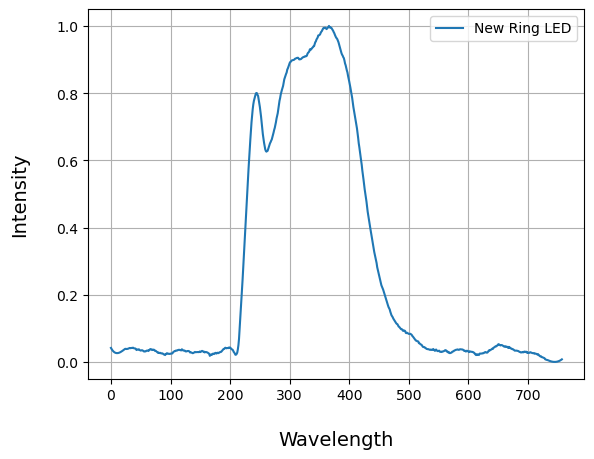

In [138]:

plt.plot((spectra_smooth - np.amin(spectra_smooth))/np.amax(spectra_smooth - np.amin(spectra_smooth)), label = 'New Ring LED')
# plt.plot(wavelengths, spectra)
# plt.ylim(0, 1)
plt.grid()
plt.ylabel('Intensity\n', fontsize = 14)
plt.xlabel('\nWavelength', fontsize = 14)
plt.legend()
plt.show()

In [73]:
# plt.plot(wavelengths, spectra__)

In [ ]:
spectra